# Investigating the Correlation Between SAT Score and Yale Matriculants
#### Ivan Adrian Nicole Tanvi

## Introduction:

Renowned for its rich history dating back to its founding in 1701, Yale is an elite and prestigious university (“Yale University | History, Schools, Alumni, & Facts”). The university is known for its competitive and rigorous academics as it had an acceptance rate as low as 4.35% for the batch of 2027 (Arora). Recent statistics show this is the lowest since the 2019 admissions round (Arora). Several of its alumni members have even gone on to become Presidents of the U.S (“Yale University | History, Schools, Alumni, & Facts”). One of the key requirements to get accepted at Yale is having a high SAT score, a standardized test that assesses the candidates on their English proficiency and mathematical skills (“Standardized Testing Requirements & Policies | Yale College Undergraduate Admissions”). Hence, our project focused on these scores and predicting the chances of applicants receiving offers by classifying the dataset. 



### Research Question

- Can we quantify the chance of a candidate’s admittance to Yale based on their average verbal, math, and SAT scores?

### Dataset Description

The dataset being used for this research provides insight into the admissions statistics for Yale College from the years 1986 to 2022. 
The variables in the dataset that will be leveraged to answer the research question include:

- **Year Entered**: The year in which the applicant entered.
- **Number of Applicants**: The total number of individuals who applied.
- **Admit Rate**: The percentage of applicants who were granted admission.
- **Matriculant Yield**: The proportion of admitted students who chose to enroll.
- **Percentile for Verbal and Math Score**: These scores will provide a quantitative measure of the applicant's proficiency in English and mathematical skills.

The main focus of the research will be on the average verbal, math, and overall SAT scores of the applicants to determine their correlation with the admit rate.

## Methods & Results:

### Importing Libraries:

In order to perform our data analysis, we need to first import several packages that will aid in the visualization and tidying of our data. In particular, the "kknn" package will allow us to use the k-nearest neighbours algorithm to form an answer to our predictive question.

In [10]:
# import libraries 
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
install.packages("kknn")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Importing the Dataset:

Next, we will import the dataset that we will be using, which is the [Yale Admissions Dataset](https://www.kaggle.com/datasets/rcd1693/yale-admissions/data) found on Kaggle.

In [13]:
# loading data 
yale_data <- read_csv("https://raw.githubusercontent.com/ikkit1314/yale_admit/main/YaleAdmits.csv")
yale_data

Rows: 37 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): VerbalScore, MathScore
dbl (29): Year Entered, Applications, Admits, AdmitRate, Matriculant, Yield,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year Entered,Applications,Admits,AdmitRate,Matriculant,Yield,VerbalScore,Verbal10th,Verbal25th,Verbal50th,⋯,SAT75,SAT90,LegacyCount,NewHaven,NewEngland,NewYorkState,EastofMississippi,WestofMississippi,U.S.Poss.Foreign,Total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1986,12528,2269,0.181,1291,0.569,Verbal,560,610,670,⋯,1450,1510,204,19,226,263,448,278,57,1291
1987,13063,2310,0.177,1312,0.568,Verbal,550,610,660,⋯,1450,1510,215,12,233,236,468,295,68,1312
1988,12797,2370,0.185,1275,0.538,Verbal,550,610,660,⋯,1450,1520,191,6,228,243,451,281,66,1275
1989,12063,2264,0.188,1279,0.565,Verbal,550,600,670,⋯,1450,1510,184,12,213,236,446,306,66,1279
1990,11922,2354,0.197,1366,0.580,Verbal,550,610,670,⋯,1460,1520,157,10,217,242,474,347,76,1366
1991,10794,2372,0.220,1290,0.544,Verbal,550,610,670,⋯,1460,1520,144,12,210,244,422,326,76,1290
1992,11054,2455,0.222,1326,0.540,Verbal,540,600,660,⋯,1440,1510,132,10,231,240,443,331,71,1326
1993,10705,2453,0.229,1317,0.537,Verbal,550,600,660,⋯,1460,1510,118,5,204,242,462,332,72,1317
1994,12991,2451,0.189,1308,0.534,Verbal,550,620,670,⋯,1460,1520,113,12,178,256,448,336,78,1308


### Tidying the Data:

Although our dataset contains all the information we need, it also contains unnecessary information, such as the legacy counts for each year; we will tidy the data using the `mutate` and `select` functions to reduce the visual clutter and create the necessary columns that we will work with. After the wrangling, we will be left with five columns, `YearEntered`, `Avg_Math_Score`, `Avg_SAT_Score`, `Avg_Verbal_Score`, and `AdmitRate`.

In [14]:
yale_data <- yale_data |> 
    mutate(
        Avg_SAT_Score = (SAT10 + SAT25 + SAT50 + SAT75 + SAT90) / 5,
        Avg_Math_Score = (Math10th + Math25th + Math50th + Math75th + Math90th) / 5,
        Avg_Verbal_Score = (Verbal10th + Verbal25th + Verbal50th + Verbal75th + Verbal90th) / 5) |> 
    select(YearEntered = `Year Entered`, "Avg_Math_Score", "Avg_SAT_Score", "Avg_Verbal_Score", "AdmitRate")
yale_data

YearEntered,Avg_Math_Score,Avg_SAT_Score,Avg_Verbal_Score,AdmitRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1986,692,1350,658,0.181
1987,692,1346,654,0.177
1988,694,1348,654,0.185
1989,696,1348,652,0.188
1990,702,1358,656,0.197
1991,702,1358,656,0.220
1992,692,1340,648,0.222
1993,698,1348,650,0.229
1994,706,1364,658,0.189


### Exploratory Data Analysis:

In order to gain more insight on our dataset, we will perform an initial data analysis by creating a plot of the average score and admit rate against year.

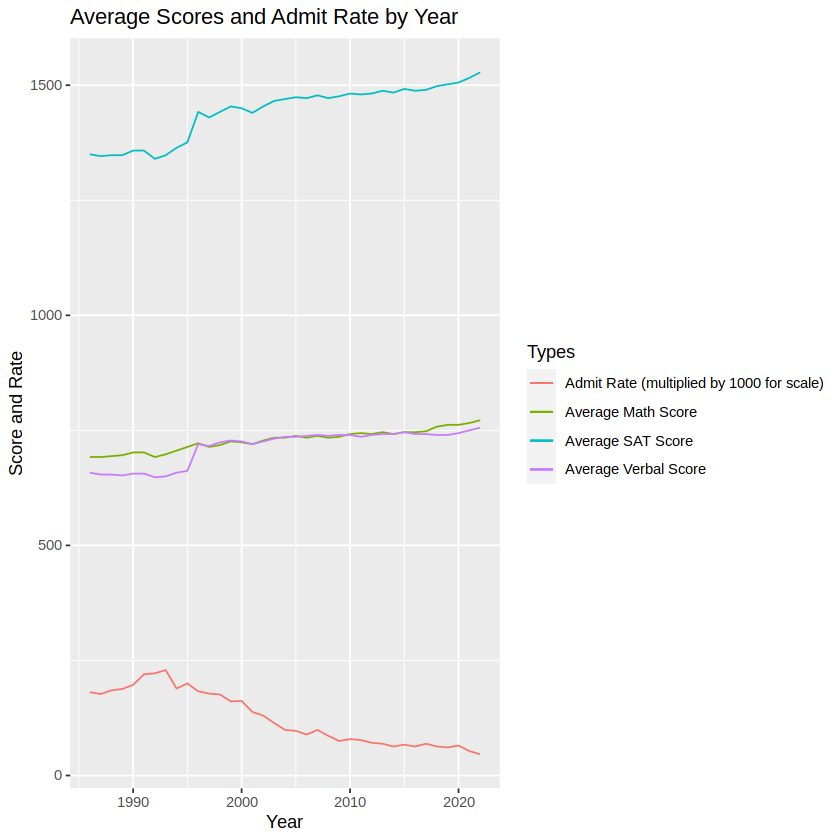

In [15]:
yale_plot <- ggplot(yale_data, aes(x = YearEntered)) +
    geom_line(aes(y = Avg_SAT_Score, color = "Average SAT Score")) +
    geom_line(aes(y = Avg_Math_Score, color = "Average Math Score")) +
    geom_line(aes(y = Avg_Verbal_Score, color = "Average Verbal Score")) +
    geom_line(aes(y = AdmitRate*1000, color = "Admit Rate (multiplied by 1000 for scale)"))+ 
    labs(title = "Average Scores and Admit Rate by Year",
         x = "Year",
         y = "Score and Rate",
         color = "Types")
yale_plot

Notice that despite the average SAT score going up every year, the admission rate actually goes down. This result suggests that either there is no relationship between SAT score and admission rate, there is a negative relationship between the two, or there is a confounding variable that is outside of the scope of this analysis. For the purpose of our analysis, we will assume that there is a relationship between the two variables, but a confounding variable causes the admission rate to go down.

### Splitting Data into Training and Testing Groups:

Next, we will separate our data into training and testing groups with a 75/25 split. We will use the training data to train our model, and use our testing data to compare the results of our model to the actual results. This comparison must be done to assess the accuracy of our model.

In [17]:
set.seed(1314)

yale_split <- initial_split(yale_data , prop = 0.75)
yale_train <- training(yale_split)
yale_test <- testing(yale_split)


### Visualizing the Training data:

We will now continue our exploratory data analysis by creating visualizations of our training data. In particular, we will focus on the average scores of each subject section (math and verbal), the overall average SAT score, Below is a plot that visualizes the relationship between the section scores and admission rate; notice the slight differences from our initial data analysis.


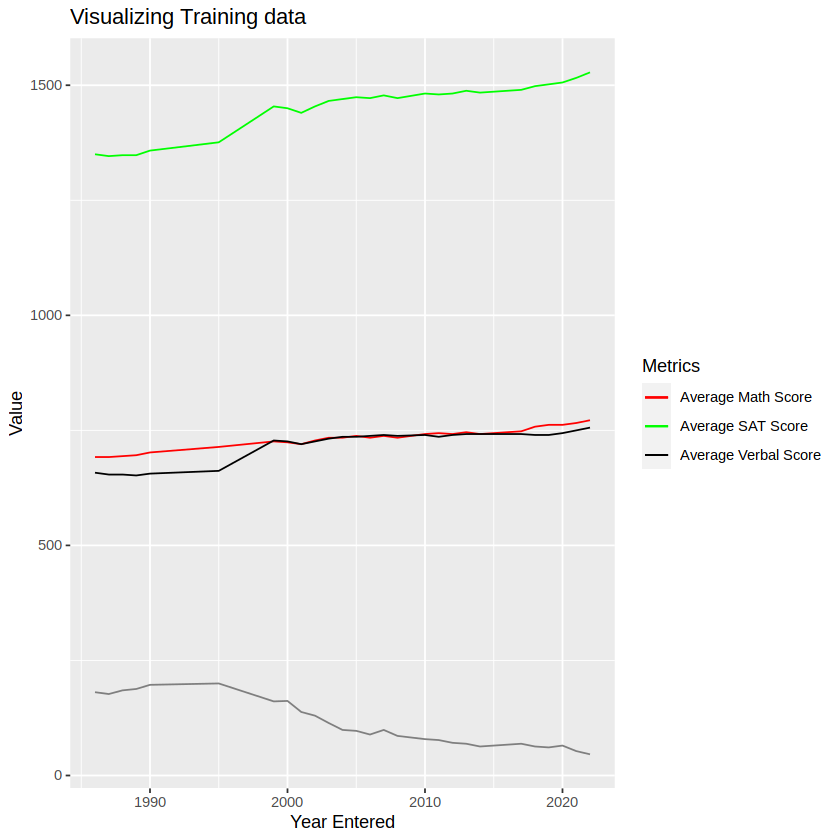

In [19]:
yale_train_plot <- ggplot(yale_train, aes(x = YearEntered)) + 
    geom_line(aes(y = AdmitRate * 1000, color = "Admit Rate Admit Rate (multiplied by 1000 for scale)")) + 
    geom_line(aes(y = Avg_Math_Score, color = "Average Math Score")) + 
    geom_line(aes(y = Avg_SAT_Score, color = "Average SAT Score")) +
    geom_line(aes(y = Avg_Verbal_Score, color = "Average Verbal Score")) +
    labs(title = "Visualizing Training data", x = 'Year Entered', y = 'Value', color = "Metrics") +
    scale_color_manual(values = c("Admit Rate" = "blue", "Average Math Score" = "red", 
                                  "Average SAT Score" = "green", "Average Verbal Score" = "black"))
yale_train_plot

### Making the Recipe for our Model:

In order for us to create a workflow, we must create a recipe for our model to predict on. Thus, next, we will create a recipe for our model to specify the predictors we want to use. In this case, we chose to focus on the `Avg_SAT_Score`, `Avg_Math_Score`, and `Avg_Verbal_Score` from our `yale_train` dataframe. We will use these to generate a quantitative prediction on the `AdmitRate` column. We will also use the `step_center()` and `step_scale()` functions in order to ensure that our data has a mean of 0 and a standard deviation of 1 respectively.

In [21]:
yale_recipe <- recipe(AdmitRate ~ Avg_SAT_Score + Avg_Math_Score + Avg_Verbal_Score, data = yale_train) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

### kNN Specification and 10-Fold Cross-Validation:

To fulfill the second requirement of our workflow, we will create a regression model that uses the `nearest_neighbor` function, but with the argument `neighbors = tune()` in order to specify that we want to find the highest accuracy k-value. Keep in mind that we will be using `weight_func = "rectangular"`, which means that the kernel function used to measure distances will be calculated by a rectangle. We will also create a 10-fold cross validation using the `vfold_cv()` function with `strata = AdmitRate` in order to set the stratification variable to the column `AdmitRate`.

In [25]:
yale_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn")  |>
    set_mode("regression")

yale_vfold <- vfold_cv(yale_train, v = 10, strata = AdmitRate)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 1 breaks instead.”
Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


### Finding Best k using Cross-Validation:

In [32]:
gridvals <- tibble(neighbors = seq(1,20))

yale_results <- workflow()  |>
    add_recipe(yale_recipe)  |>
    add_model(yale_spec)  |>
    tune_grid(resamples = yale_vfold, grid = gridvals)  |>
    collect_metrics()

best_k <- yale_results |>
    filter(.metric == "rmse") |>
    select(neighbors, mean)

best_k

! Fold01: preprocessor 1/1, model 1/1: 20 samples were requested but there were 24 rows in the data. 19 will be...

! Fold02: preprocessor 1/1, model 1/1: 20 samples were requested but there were 24 rows in the data. 19 will be...

! Fold03: preprocessor 1/1, model 1/1: 20 samples were requested but there were 24 rows in the data. 19 will be...

! Fold04: preprocessor 1/1, model 1/1: 20 samples were requested but there were 24 rows in the data. 19 will be...

! Fold04: internal:
  There were 3 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(truth = Admit...
    na_rm = na_rm)`.
  ℹ In group 17: `neighbors = 17`.
  Caused by warning:
  ! A correlation computation is required, but `estimate` is c...
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 r...

! Fold05: preprocessor 1/1, model 1/1: 20 samples were requested but there were 24 rows in the data. 19 will be...

! Fold05: internal:
  There were 3 warnings in `dplyr::summarise()`.

neighbors,mean
<int>,<dbl>
1,0.009813102
2,0.009558068
3,0.010412742
4,0.011366157
5,0.011841741
6,0.012643719
7,0.014101459
8,0.015950463
9,0.017895726


Thus, the number of neighbors with the lowest root mean square prediction error (RMSPE) is 2; however, in order to reduce the risk of overfitting our data, which happens when our model perfectly fits our training dataset, we will choose a slightly higher value for k that gives the next lowest mean error, 3.

In [35]:
best_k <- 3

### Fitting the Model with Best k:

Now that we have found the best value fork, we will recreate the model specification, but now with the `neighbors = best_k` argument, which we justified earlier to be 3. Finally, we can create our workflow with the `workflow()` argument, and fit our `yale_train` dataframe, which will then allow us to get predictions on `yale_test`, the testing set that we assigned earlier.

In [52]:
 final_yale_spec <- nearest_neighbor(weight_func = "rectangular" , neighbors = best_k)|>
                set_engine("kknn") |>
                set_mode("regression")

final_yale_fit <- workflow() |>
    add_recipe(yale_recipe) |>
    add_model(final_yale_spec) |>
    fit(data = yale_train)

final_yale_result <- final_yale_fit |>
                    predict(yale_test) |>
                    bind_cols(yale_test) |>
                    metrics(truth = AdmitRate, estimate = .pred) |>
                    filter(.metric == "rmse")

final_yale_result

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.02598205


Thus, the RMSPE of our testing set is 0.02598205%. Given that the model is predicting the admission rate of a Yale applicant, and the RMSPE is less than 0.05% off of the actual value, it is safe to assume that our model is fairly accurate.

### Visualizing the Data Analysis:

We will now create a facet grid of the three predictor variables, in which each plot will have a blue line and several points; the points represent the actual data, whereas the blue line illustrates the accuracy of our model.

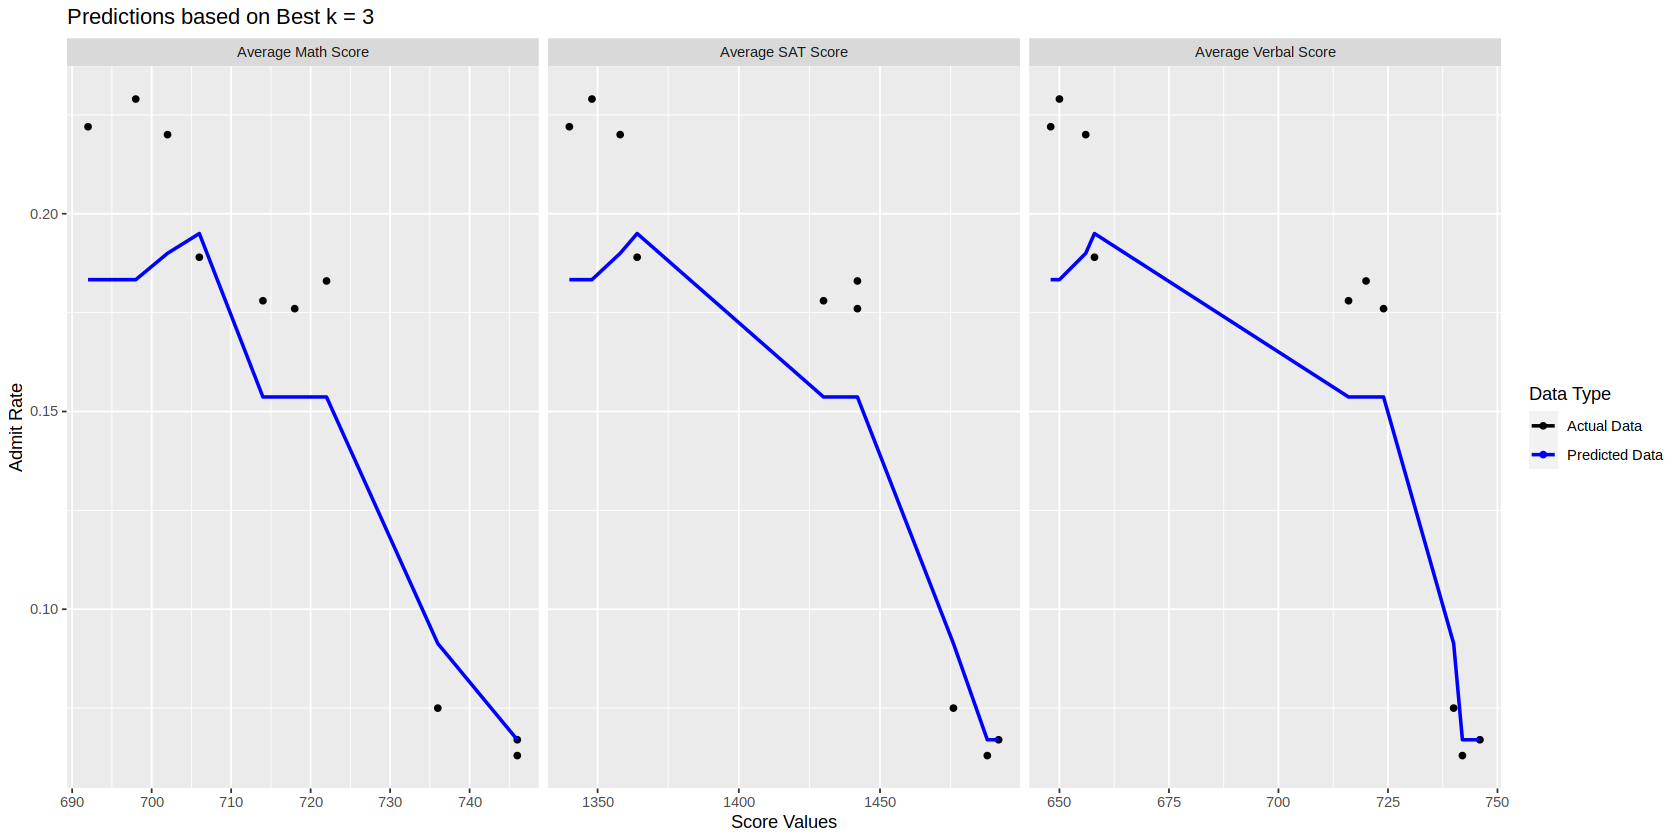

In [38]:
facet_titles <- c(
  Avg_SAT_Score = "Average SAT Score",
  Avg_Math_Score = "Average Math Score",
  Avg_Verbal_Score = "Average Verbal Score"
)

options(repr.plot.width = 14, repr.plot.height = 7)
yale_long <- final_yale_result |>
  pivot_longer(cols = c(Avg_SAT_Score, Avg_Math_Score, Avg_Verbal_Score), 
               names_to = "Score_Type", 
               values_to = "Score_Value")

yale_k_plot <- ggplot(yale_long, aes(x = Score_Value, y = AdmitRate)) +
             geom_point(aes(color = "Actual Data")) +
            xlab("Score Values")+
             ylab("Admit Rate") +
             geom_line(aes(y = .pred, color = "Predicted Data"), size = 1) +
             facet_grid(~ Score_Type, scales = "free_x",labeller = labeller(Score_Type = facet_titles)) +
             ggtitle(paste0("Predictions based on Best k = ", best_k)) +
             scale_color_manual(values = c("Actual Data" = "black", "Predicted Data" = "blue"), 
                                name = "Data Type")


yale_k_plot


### Prediction of a new Observation:

Now, in order to test the model, we will create a new observation with fake SAT scores, and quantify the admission rate of that particular student into Yale. It is significant to note that generalizing admissions into universities with standardized testing alone does not illustrate the entire picture. In a more realistic model, there are countless confounding variables that influence the decision of any particular applicant; however, for the sake of our data analysis, we will assume that the admissions process is based on the SAT alone.

In [39]:
new_observation <- tibble(
  Avg_Math_Score = 700,  
  Avg_SAT_Score = 1400,  
  Avg_Verbal_Score = 700)

predicted_admit_rate <- final_yale_fit |>
  predict(new_observation) |>
  pull(.pred) %>%
  {. * 100} |>
  round(2)

predicted_admit_rate

[1] 17.83

Thus, the chances of our new observation being accepted into Yale is 17.83%.

## Discussion:

**Final Results and Expectations:**

To produce a model that predicted the chance of an applicant’s admittance rate for Yale, a kNN regression algorithm was chosen. 
- **Finding the k-value:** After training the data, cross-validation was performed to produce the best k-value, which resulted in k = 2. However, due to the nature of overfitting when k is too small, the next best k value was 3. Thus, the final model was trained with k = 3.
- **Accuracy of the model:** Using k = 3, the model yielded an RMSPE of approximately 0.02598205, which is extremely accurate considering that the model is predicting values that are less than 0.05% off of the true value.

The final result was expected; there should naturally be a correlation between standardized testing grades and admission rate; however, according to the initial exploratory data analysis, the overall admission rate lowered despite SAT scores being higher on average. This implies that there is a different confounding variable impacting admissions into Yale.

**Impact of Findings:**
- **Estimated admittance rate:** Applicants interested in applying to Yale may have a better understanding of their chances of being admitted into Yale. Those under a certain score will know not to apply to Yale due to a very low chance of being accepted. On the contrary, those who have an SAT score above the threshold may have a chance of being accepted. 
- **Financial security:** Those who have a score under the threshold will know not to apply due to the high chance of being rejected. Doing so will save money as they do not pay the application fee. Furthermore, those with scores significantly under the threshold may save a lot of money by not retaking the SAT. 
- **Increased motivation:** Students may become more academically motivated after understanding their chances of getting into Yale. Such an understanding may allow students to significantly improve their SAT scores which may result in their acceptance into Yale. 

**Future Questions:**
- **The weight of SAT Scores in applications:** In college applications, a lot of factors may impact a student’s acceptance or rejection into a college. Due to this variety of factors, it is important to understand the importance of SAT scores in a student’s application. Knowing if a student would be rejected or accepted based on their SAT score alone could lead to more insight into the chances of a student’s admittance into Yale. 
- **SAT scores for students of diverse backgrounds:** Though Yale strives to create a diverse community, exploring if an applicant’s SAT score would “count less” based on where they are from is important in determining Yale’s actual diversity. 


## Bibilography:

- Arora, Anika. “Yale accepts 4.35 percent of applicants, marking lowest acceptance rate in history.” Yale Daily News, 30 March 2023, https://yaledailynews.com/blog/2023/03/30/yale-accepts-4-35-percent-of-applicants-marking-lowest-acceptance-rate-in-history/. Accessed 9 December 2023. 

- Dallavia, Ryan C. “Yale College Admissions.” Kaggle, Yale University, Office of Institutional Research, 31 Dec. 1985, www.kaggle.com/datasets/rcd1693/yale-admissions/data. Accessed 9 December 2023.

- “Standardized Testing Requirements & Policies | Yale College Undergraduate Admissions.” Yale Admissions, https://admissions.yale.edu/standardized-testing. Accessed 9 December 2023.  

- “Yale University | History, Schools, Alumni, & Facts.” Britannica, 28 November 2023, https://www.britannica.com/topic/Yale-University. Accessed 9 December 2023. 
